In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [24]:
df=pd.read_csv("House Price Prediction Dataset.csv")
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [26]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

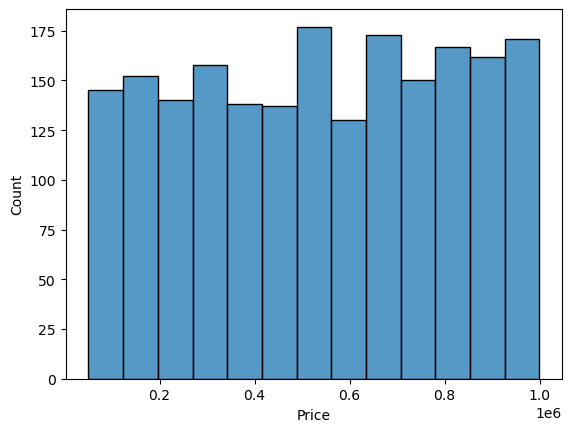

In [28]:
sns.histplot(df,x="Price")
plt.show()

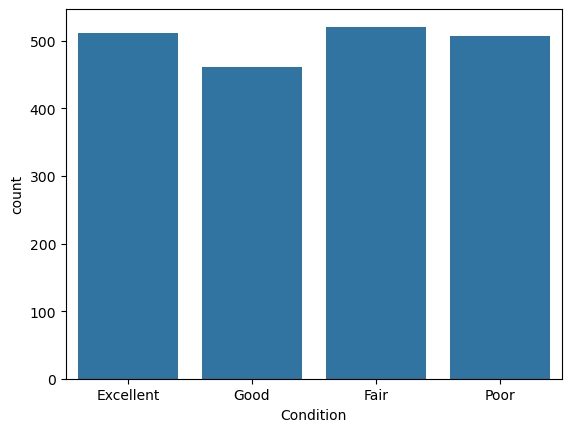

In [30]:
sns.countplot(df,x="Condition")
plt.show()

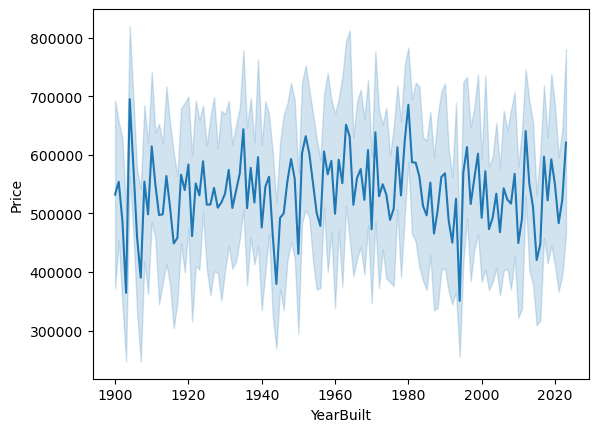

In [32]:
sns.lineplot(df,x="YearBuilt",y="Price")
plt.show()

In [ ]:
# Drop the ID column
df.drop(columns=["Id"], inplace=True)


In [34]:
# Feature Engineering: Creating new features
df["Price_per_sqft"] = df["Price"] / df["Area"]
df["Age_of_Property"] = 2025 - df["YearBuilt"]

In [37]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [39]:
categorical_cols = ["Location", "Condition", "Garage"]
numerical_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Price_per_sqft", "Age_of_Property"]

In [41]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

In [45]:
X_processed = np.hstack((X_scaled, X_encoded))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [49]:
optimized_rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
optimized_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [50]:
y_pred_rf_opt = optimized_rf_model.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test, y_pred_rf_opt)
mse = mean_squared_error(y_test, y_pred_rf_opt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf_opt)

In [52]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 12829.216716924217
Root Mean Squared Error: 19273.83717075489
R^2 Score: 0.9952251106301716


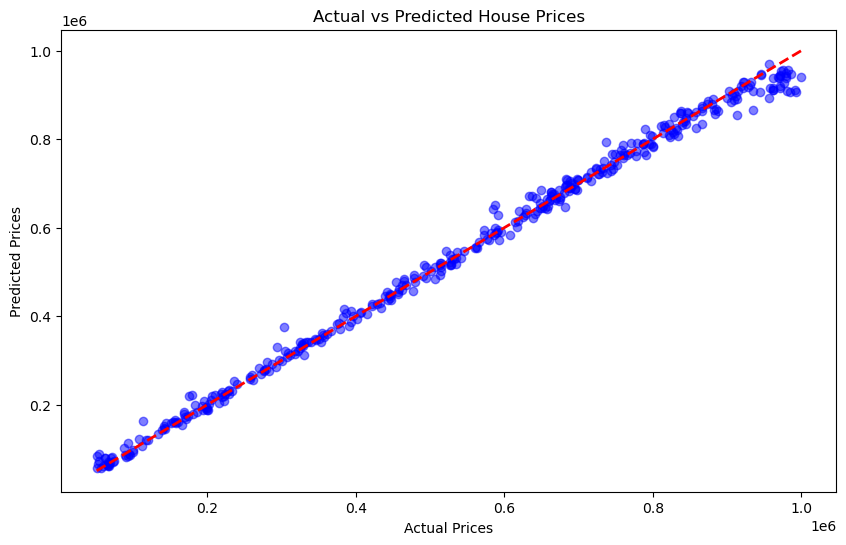

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_opt, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()